# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [125]:
m=1
p = 0.01#0.4
q = 1#1.0#0.1#0.1#0.01#0.9#0.01#0.5 #Pure SF is q=0
run = 1

1

Choose your grid

In [126]:
global compactified=true
global loggrid=false
global bisection=false
global zeroformat=false
global twod=true

global source=false

false

In [127]:
function compactify(r)
    x=r/(1+r)
    return x
end

compactify (generic function with 1 method)

In [128]:
using Quadmath, Printf

res=m;
N=2.0^m*400.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=2.0
end

dx=Xf/N
if loggrid==false
    dt=0.5*round(dx,digits=10)
else
    dt=0.1*round(dx,digits=10)
end
Nt=N
Tf=Nt*dt;

In [129]:
print(N)

400.0

In [130]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

# Grid

In [112]:
using Printf
include("./TMYangMillsTHREE.jl");

In [113]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
end;

step size is  0.0025
the time step is 0.0005025094107034211


# Initial data of m β Ψ and Ψ,x

In [131]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initxi=zeros(L)
initderxi=zeros(L)

state_array=[initm initbeta initxi initderxi];

#WBAR,R
A=0.1
r0=0.3
sigma=0.1

initderxi[4:L-3] = init_derpsi(initX1,r0,sigma,A)

state_array[:,4] = initderxi
state_array=ghost(state_array)

####
#XI FROM XI,X

derxi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

funcs=[derxi_func];

In [132]:
y0=[0.0 0.0 0.0]

if twod==true
        state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
    else
        state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
end

#state_array = ghost(state_array);

401×3 Matrix{Float64}:
 0.0          0.0          0.0
 9.06808e-12  1.69207e-9   3.61197e-8
 3.48439e-11  4.82468e-9   8.40539e-8
 7.41898e-11  7.85278e-9   1.46628e-7
 1.33602e-10  1.13621e-8   2.27249e-7
 2.22727e-10  1.57166e-8   3.30011e-7
 3.55689e-10  2.13041e-8   4.59821e-7
 5.53018e-10  2.86068e-8   6.22546e-7
 8.44387e-10  3.82523e-8   8.25179e-7
 1.27245e-9   5.10708e-8   1.07604e-6
 1.89821e-9   6.81643e-8   1.38499e-6
 2.80852e-9   9.09973e-8   1.76372e-6
 4.12641e-9   1.21513e-7   2.22602e-6
 ⋮                        
 0.123813     0.196885    -7.836e-10
 0.123813     0.196885    -7.836e-10
 0.123813     0.196885    -7.836e-10
 0.123813     0.196885    -7.836e-10
 0.123813     0.196885    -7.836e-10
 0.123813     0.196885    -7.836e-10
 0.123813     0.196885    -7.836e-10
 0.123813     0.196885    -7.836e-10
 0.123813     0.196885    -7.836e-10
 0.123813     0.196885    -7.836e-10
 0.123813     0.196885    -7.836e-10
 0.123813     0.196885    -7.836e-10

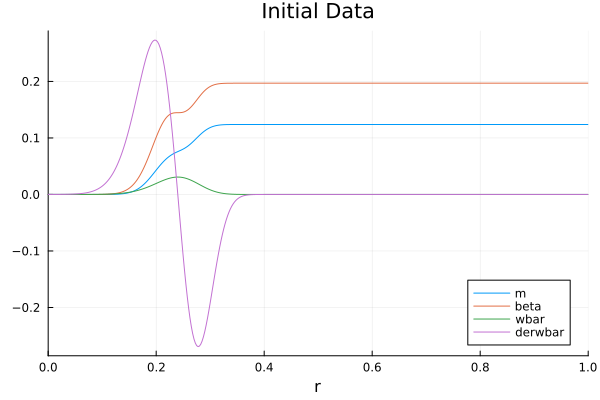

In [133]:
using Plots #showing initial data and the initial status of the horizon finder
plot((initX[4:L-3]), state_array[4:L-3,1:4], xaxis="r",title="Initial Data", labels=["m" "beta" "wbar" "derwbar"],xlim=[0,1])

In [134]:
function compactify(r)
    return r/(1+r)
end
function uncompactify(x)
    return x/(1-x)
end;

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [135]:
using CSV, Tables
#CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "xi", "derxi", "derderxi"]

derderxi=Der_arrayLOP(state_array,4,initX)
print_muninn(files, 0, [state_array[:,1:4] derderxi],res,"w", initX)

In [136]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [137]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

0.4020075266269719


In [138]:
using Base.Threads
Threads.nthreads()

4

In [139]:
monitor_ratio[5:L-4] = 2 .* state_array[5:L-4,1] ./ initX[5:L-4] .* (1 .- initX[5:L-4]);
maximum(monitor_ratio)

0.5535213299354488

In [140]:
dt=0.002/2^(m-1)

0.002

 ## Time evolution

fixed grid

In [141]:
finaltime=1.5
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 50 dt is 0.000502509406354035, t=0.02512547032126712 speed is 0.4975031249939757, dx/dt=4.975031249939757


iteration 100 dt is 0.0005025094063680966, t=0.05025094063924772 speed is 0.49750312498005433, dx/dt=4.9750312498005425


iteration 150 dt is 0.0005025094064214144, t=0.07537641095873458 speed is 0.49750312492726767, dx/dt=4.975031249272676


iteration 200 dt is 0.0005025094066055894, t=0.1005018812836005 speed is 0.4975031247449274, dx/dt=4.975031247449274


iteration 250 dt is 0.0005025094071901283, t=0.12562735162612323 speed is 0.497503124166212, dx/dt=4.97503124166212


iteration 300 dt is 0.0005025094088878717, t=0.15075282202179552 speed is 0.4975031224853826, dx/dt=4.975031224853825


iteration 350 dt is 0.0005025094133844516, t=0.17587829256366141 speed is 0.49750311803360014, dx/dt=4.975031180336002


iteration 400 dt is 0.0005025094241959671, t=0.2010037634715767 speed is 0.4975031073297956, dx/dt=4.975031073297956


iteration 450 dt is 0.000502509447601554